<a href="https://colab.research.google.com/github/nomadtree/0329/blob/master/04018%EC%99%80%EC%9D%B8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#범주형 데이터로 실습
import pandas as pd
r_wine=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0418/winequality-red.csv',sep=';')
w_wine=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0418/winequality-white.csv',sep=';')
r_wine.head()

In [ ]:
w_wine.head()

In [ ]:
r_wine['color']=0

In [ ]:
w_wine['color']=1

In [ ]:
wine=pd.concat([r_wine, w_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [ ]:
wine.to_csv('wine.csv',sep=',')

In [ ]:
#2단계 독립변수, 종속변수 결정
y=wine['color'] # 결과
x=wine.drop('color',axis=1) # 원인
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


##3단계는 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=0)
print('train data 개수:',x_train.shape)
print('test data 개수:',x_test.shape)


train data 개수: (4547, 12)
test data 개수: (1950, 12)


## 4단계는 의사결정 나무 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(random_state=0, max_depth=5)
#학습 실행
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

##5단계 정확도 평가

In [ ]:
# 학습데이터 정확도 확인
print('학습데이터=',tree_model.score(x_train,y_train))

# 검증데이터 정확도 확인
print('검증데이터=',tree_model.score(x_test,y_test))

학습데이터= 0.990103364855949
건증데이터= 0.9861538461538462


##6단계 예측

In [ ]:
pred=tree_model.predict(x_test)
print('예측=',pred[:30])
print('실제=',y_test.values[:30])


예측= [1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1]
실제= [1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1]


## 컨퓨전 행렬 평가

In [ ]:
from sklearn import metrics

tree_matrix=metrics.confusion_matrix(y_test, pred)
print(tree_matrix)



[[ 465   13]
 [  14 1458]]


In [ ]:
metrics.confusion_matrix?

In [ ]:
 tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()
 print( tn, fp, fn, tp)

465 13 14 1458


Text(0.5, 1.0, 'confusion matrix heatmap')

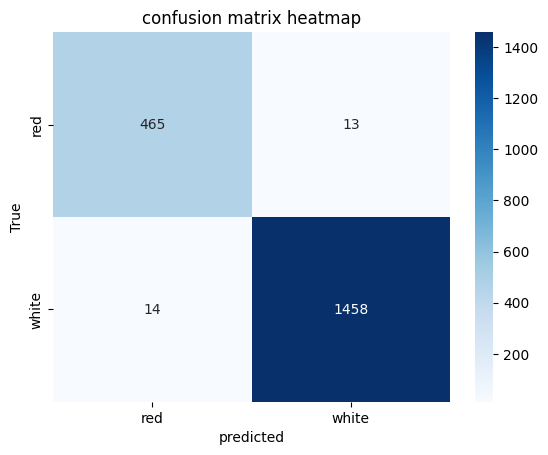

In [ ]:
# 혼동행렬 히트맵으로 표현
import seaborn as sns
import matplotlib.pyplot as plt
# 테스트데이터로 모델 예측값을 x데이터로
y_pred=tree_model.predict(x_test)
# 혼동행렬 계산
cm= metrics.confusion_matrix(y_test,y_pred)
class_labels=['red','white']
sns.heatmap(cm,cmap='Blues', annot=True,fmt='d',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('confusion matrix heatmap')

In [ ]:
# 전체 예측(양성, 음성)에서 정답을 잘 맞춤
accuracy = (tp+tn)/(tn+fp+fn+tp)
print('정확도(accuracy)',accuracy)

정확도(accuracy) 0.9861538461538462


In [ ]:
# 정밀도는 양성으로 예측한 것 중에서 실제 양성인 것

fine=(tp)/(tp+fp)
print('정밀도',fine)


정밀도 0.991162474507138


In [ ]:
# 특이도는 실제는 음성인데 예측을 음성으로 한 것

spec=(tn)/(tn+fp)
print('특이도',spec)

특이도 0.9728033472803347


In [ ]:
# 민감도(재현율) 실제 양성인데 예측도 양성으로 한것
sen=tp/(tp+fn)
print('민감도',sen)

민감도 0.9904891304347826


In [ ]:
# 조화평균은 정밀도와 민감도를 이용한 점수
con=(tp+tn)/(tp+fn+fp+tn)
print('조화평균',con)

조화평균 0.9861538461538462


In [ ]:
#ROC커브 실제 양성중에서 양성으로 분류한 비율
TPR=tp/(tp+fn)
print('TPR:', TPR)

# 실제 음성중에서 예측을 양성으로 분류한 비율
FPR=fp/(tn+fp)
print('FPR:', FPR)

TPR: 0.9904891304347826
FPR: 0.027196652719665274


(0.0, 1.05)

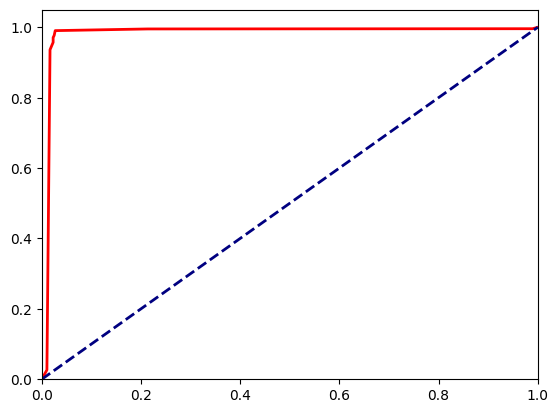

In [ ]:
#ROC커브

from sklearn.metrics import roc_curve,auc
y_prob=tree_model.predict_proba(x_test)[:,1]
# ROC커브 생성
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
#면적 계산
roc_auc=auc(fpr,tpr)


plt.plot(fpr,tpr,lw=2,color='red',label='ROC curve')
plt.plot([0,1],[0,1],lw=2,color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])


In [ ]:
tree_report=metrics.classification_report(y_test,pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       478
           1       0.99      0.99      0.99      1472

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950



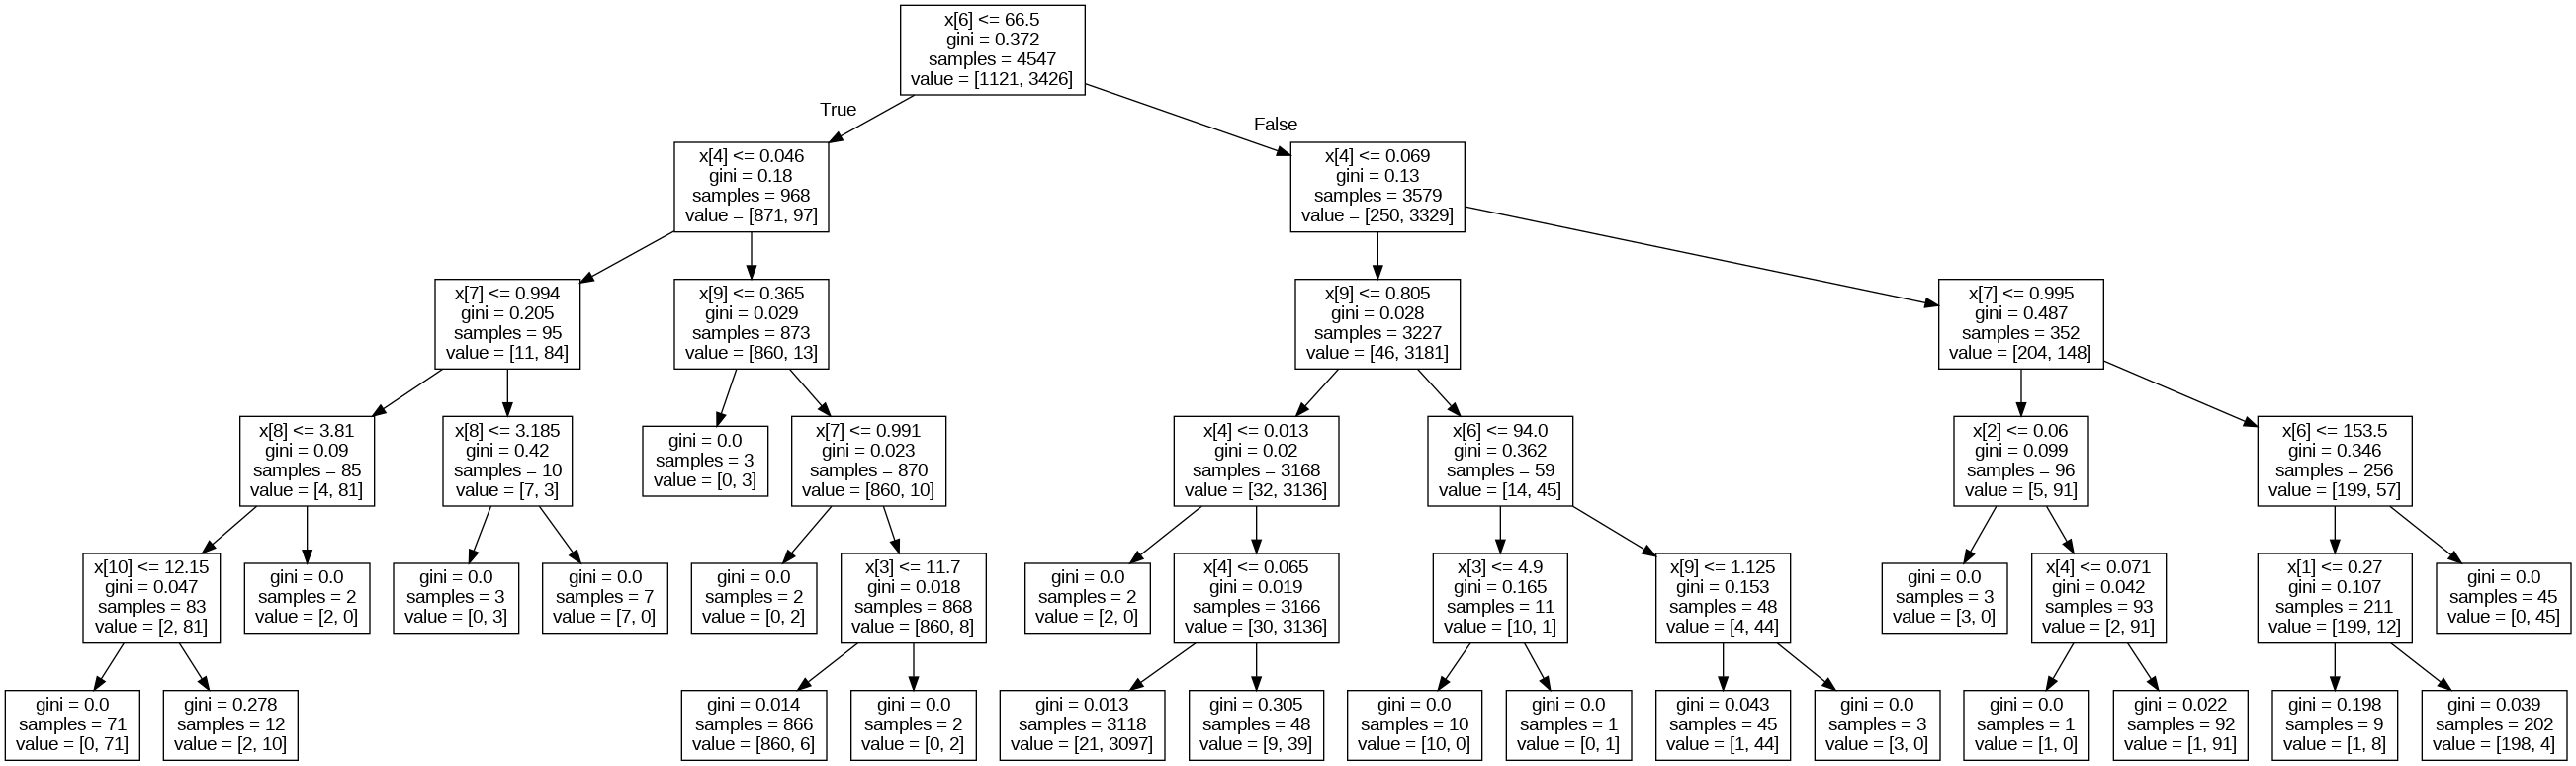

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
export_graphviz(tree_model,out_file='tree.dot')
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi = 600'])
Image(filename='tree.png')